In [1]:
import numpy as np
SIZE = 168
s1 = np.empty((12, 600, 600))

In [22]:

def make_overlapping_windows(tiles: np.ndarray, diff = 7) -> np.ndarray:
    """ Takes the A x B window IDs (n, 4)for an
     X by Y rectangle and enures that the windows are the right
     size (e.g. square, 150 x 150) for running predictions on """
    tiles2 = np.copy(tiles)
    n_x = np.sum(tiles2[:, 0] == 0)
    n_y = np.sum(tiles2[:, 1] == 0)

    tiles2[:n_x, 2] += diff
    tiles2[-n_x:, 2] += diff
    to_adjust = np.full((tiles.shape[0]), diff * 2).astype(np.uint16)
    
    for i in range(len(to_adjust)):
        if (i % n_y == 0) or ((i + 1) % n_y == 0):
            to_adjust[i] -= diff
    tiles2 = tiles2.astype(np.int64)
    tiles2[:, 3] += to_adjust
    tiles2[n_x:-n_x, 2] += (diff * 2)
    tiles2[n_x:, 0] -= diff
    tiles2[:, 1] -= diff
    tiles2[:, 3] = 182
    tiles2[:, 2] = 182
    tiles2[tiles2 < 0] = 0.
    return tiles2

gap_x = int(np.ceil((s1.shape[1] - SIZE) / 4))
gap_y = int(np.ceil((s1.shape[2] - SIZE) / 4))
tiles_folder_x = np.hstack([np.arange(0, s1.shape[1] - SIZE, gap_x), np.array(s1.shape[1] - SIZE)])
tiles_folder_y = np.hstack([np.arange(0, s1.shape[2] - SIZE, gap_y), np.array(s1.shape[2] - SIZE)])
print(f'There are: {len(tiles_folder_x) * len(tiles_folder_y)} subtiles')

def cartesian(*arrays):
    mesh = np.meshgrid(*arrays)  # standard numpy meshgrid
    dim = len(mesh)  # number of dimensions
    elements = mesh[0].size  # number of elements, any index will do
    flat = np.concatenate(mesh).ravel()  # flatten the whole meshgrid
    reshape = np.reshape(flat, (dim, elements)).T  # reshape and transpose
    return reshape

windows = cartesian(tiles_folder_x, tiles_folder_y)
win_sizes = np.full_like(windows, SIZE)
tiles_folder = np.hstack([windows, win_sizes])
tiles_folder = np.sort(tiles_folder, axis = 0)
tiles_folder[:, 1] = np.tile(np.unique(tiles_folder[:, 1]), 
    int(len(tiles_folder[:, 1]) / len(np.unique(tiles_folder[:, 1]))))
tiles_array = make_overlapping_windows(tiles_folder, diff = 7)

There are: 25 subtiles


In [25]:
import hickle as hkl
x = hkl.load("../../project-monitoring/tiles/2275/1165/raw/s1/2275X1165Y.hkl")

In [28]:
np.sum(x == 65535, axis = (1, 2, 3))

array([     0,      0,      0,      0,      0, 471160,      0, 467976,
            0,      0,      0,      0])

In [32]:
n_pix_oob = np.sum(x >= 65535, axis = (1, 2, 3))
print(f"N_oob: {n_pix_oob}")
to_remove = np.argwhere(n_pix_oob > (300*300)/5)
print(to_remove)


N_oob: [     0      0      0      0      0 471160      0 467976      0      0
      0      0]
[[5]
 [7]]


In [29]:
x.shape

(12, 632, 620, 2)

In [2]:
import hickle as hkl
import numpy as np

In [40]:
y.shape

(12, 309, 301, 6)

In [175]:
%run ../../src/downloading/utils.py
%run ../../src/preprocessing/whittaker_smoother.py

In [421]:
y.shape

(12, 300, 300, 6)

In [423]:
x = hkl.load("tifs/s2/1410X1196Y.hkl")
y = hkl.load("tifs/s2/1409X1196Y.hkl")
x = x[:, :300, :300, :]
y = y[:, :300, :300, :]
print(np.mean(y[9,..., 0]))
print(np.mean(x[9, ..., 0]))

x_new = np.empty((15, 600, 600, 6))
y_new = np.empty((12, 600, 600, 6))
for band in range(6):
    for time in range(x.shape[0]):
        x_new[time, ..., band] = resize(x[time,..., band], (600, 600), 1)
        
for band in range(6):
    for time in range(y.shape[0]):
        y_new[time, ..., band] = resize(y[time,..., band], (600, 600), 1)

5926.325011111111
13499.314444444444


In [424]:

x = np.delete(x, 11, 0)



In [425]:
def id_iqr_outliers(arr):
    if arr.shape[0] > 6:
        lower_qr = np.percentile(arr, 25, axis = 0)
        upper_qr = np.percentile(arr, 75, axis = 0)
        iqr = (upper_qr - lower_qr) * 2
        lower_thresh = lower_qr - iqr
        upper_thresh = upper_qr + iqr        
        return lower_thresh, upper_thresh
    else:
        return None, None


lower_thresh, upper_thresh = id_iqr_outliers(y)
if lower_thresh is not None and upper_thresh is not None:
    above = np.sum(y > upper_thresh, axis = (1, 2))
    below = np.sum(y < lower_thresh, axis = (1, 2))
    probs = above + below
    print(np.sum(probs > (0.5 * y.shape[1] * y.shape[2]), axis = (1)))


[0 0 0 0 0 0 0 0 0 0 0 0]


<AxesSubplot:>

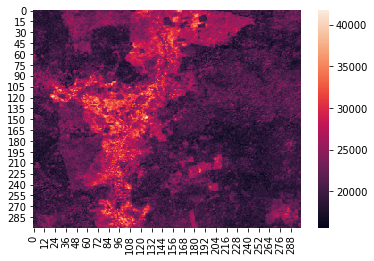

In [426]:
sns.heatmap(upper[..., 3])

In [427]:
x, _ = calculate_and_save_best_images(x, x_dates)
y, _ = calculate_and_save_best_images(y, y_dates)


In [428]:
x.shape

(72, 300, 300, 6)

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

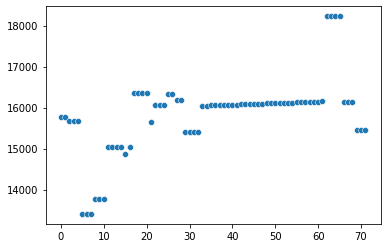

In [429]:
sns.scatterplot([x for x in range(y.shape[0])], np.mean(y[..., 3], axis = (1, 2)) )

In [430]:

sm = Smoother(lmbd = 800, size = 72, nbands = 6, dim = 300)
x = sm.interpolate_array(x)
y = sm.interpolate_array(y)

In [431]:
x = np.concatenate([y, x], axis = 2)

In [432]:
x_dates = hkl.load("tifs/s2_dates_1410X1196Y.hkl")
y_dates = hkl.load("tifs/s2_dates_1409X1196Y.hkl")
print(x_dates)
print(y_dates)

ValueError: Provided argument 'file_obj' does not appear to be a valid hickle file! (Unable to open file (unable to open file: name = 'tifs/s2_dates_1410X1196Y.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0))

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

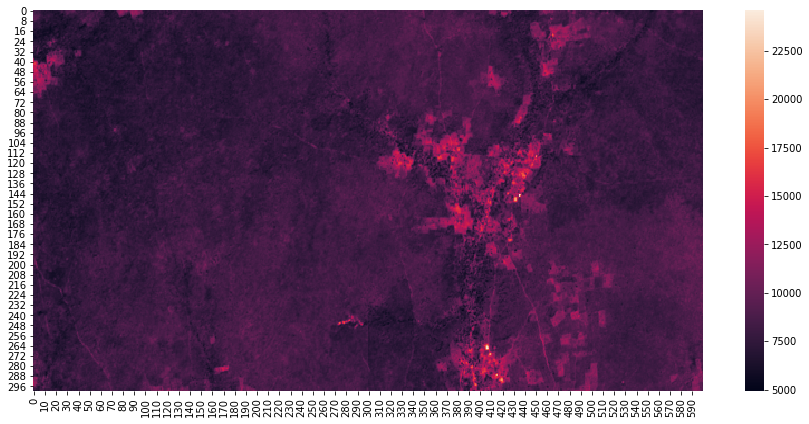

In [448]:
plt.figure(figsize=(15,7))
sns.heatmap(x[0, ..., 0])

In [384]:
def convert_to_db(x: np.ndarray, min_db: int) -> np.ndarray:
    """ Converts unitless backscatter coefficient
        to db with a min_db lower threshold
        
        Parameters:
         x (np.ndarray): unitless backscatter (T, X, Y, B) array
         min_db (int): integer from -50 to 0
    
        Returns:
         x (np.ndarray): db backscatter (T, X, Y, B) array
    """
    
    x = 10 * np.log10(x + 1/65535)
    x[x < -min_db] = -min_db
    x = (x + min_db) / min_db
    return np.clip(x, 0, 1)

x = np.float32(hkl.load("tifs/1410X1196Y.hkl")) / 65535
y = np.float32(hkl.load("tifs/1409X1196Y.hkl")) / 65535


x = np.concatenate([y, x], axis = 2)

x = convert_to_db(x[..., 0], 22)

In [400]:
from skimage.transform import resize
s1 = hkl.load("tifs/1410X1196Y.hkl")

# The S1 data here needs to be bilinearly upsampled as it is in training time! 
s1 = s1.reshape((s1.shape[0], s1.shape[1] // 2, 2, s1.shape[2] // 2, 2, 2))
s1 = np.mean(s1, (2, 4))
s1 = resize(s1, (s1.shape[0], s1.shape[1] * 2, s1.shape[2] * 2, 2), order = 1)
s1 = s1 / 65535
s1[..., -1] = convert_to_db(s1[..., -1], 22)
s1[..., -2] = convert_to_db(s1[..., -2], 22)

<AxesSubplot:>

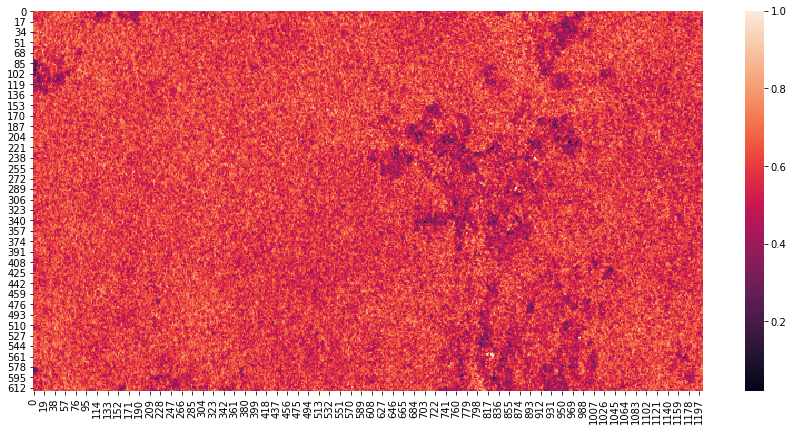

In [396]:
plt.figure(figsize=(15,7))
sns.heatmap(x[11])

In [398]:
x = np.float32(hkl.load("tifs/dem_1410X1196Y.hkl"))
y = np.float32(hkl.load("tifs/dem_1409X1196Y.hkl"))
x = np.concatenate([y, x], axis = 1)

<AxesSubplot:>

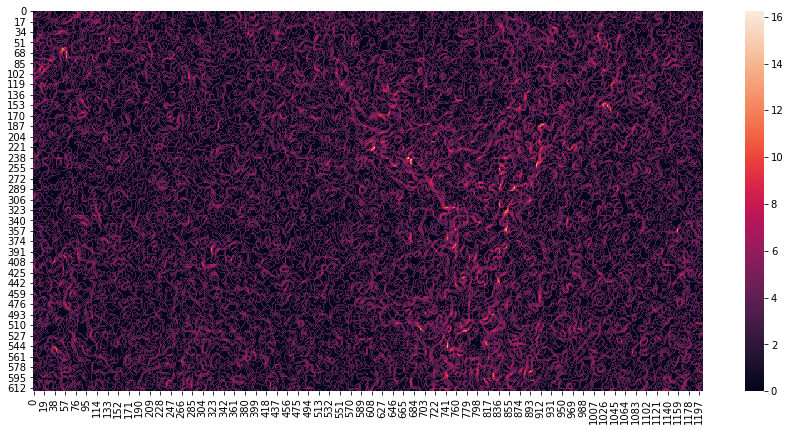

In [399]:
plt.figure(figsize=(15,7))
sns.heatmap(x)

In [617]:
SIZE = 168
min_all = [0.006576638437476157, 0.0162050812542916, 0.010040436408026246, 0.013351644159609368, 0.01965362020294499,
               0.014229037918669413, 0.015289539940489814, 0.011993591210803388, 0.008239871824216068, 0.006546120393682765,
               0.0, 0.0, 0.0, -0.1409399364817101, -0.4973397113668104, -0.09731556326714398, -0.7193834232943873]
max_all = [0.2691233691920348, 0.3740291447318227, 0.5171435111009385, 0.6027466239414053, 0.5650263218127718, 
           0.5747005416952773, 0.5933928435187305, 0.6034943160143434, 0.7472037842374304, 0.7000076295109483, 
           0.509269855802243, 0.948334642387533, 0.6729257769285485, 0.8177635298774327, 0.35768999002433816,
           0.7545951919107605, 0.7602693339366691]

min_all = np.array(min_all)
max_all = np.array(max_all)
min_all = np.broadcast_to(min_all, (13, SIZE + 14, SIZE + 14, 17)).astype(np.float32)
max_all = np.broadcast_to(max_all, (13, SIZE + 14, SIZE + 14, 17)).astype(np.float32)
midrange = (max_all + min_all) / 2
midrange = midrange.astype(np.float32)
rng = max_all - min_all
rng = rng.astype(np.float32)

In [662]:
%run ../../src/preprocessing/indices.py
x = np.load("tifs/1410X1196Y/0226.npy")
indices = np.empty((13, x.shape[1], x.shape[2], 17))
indices[:12, ..., :13] = x
indices[:12, ..., 13] = evi(x)
indices[:12, ...,  14] = bi(x)
indices[:12, ...,  15] = msavi2(x)
indices[:12, ...,  16] = grndvi(x)
indices[-1] = np.median(indices[:12], axis = 0)

subtile = indices
subtile = subtile.astype(np.float32)
subtile = np.clip(subtile, min_all, max_all)
subtile = (subtile - midrange) / (rng / 2)
x = subtile

y = np.load("tifs/1409X1196Y/434226.npy")
indices = np.empty((13, y.shape[1], y.shape[2], 17))
indices[:12, ..., :13] = y
indices[:12, ..., 13] = evi(y)
indices[:12, ...,  14] = bi(y)
indices[:12, ...,  15] = msavi2(y)
indices[:12, ...,  16] = grndvi(y)
indices[-1] = np.median(indices[:12], axis = 0)
subtile = indices
subtile = subtile.astype(np.float32)
subtile = np.clip(subtile, min_all, max_all)
subtile = (subtile - midrange) / (rng / 2)
y = subtile
#x = np.concatenate([y, x], axis = 2)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

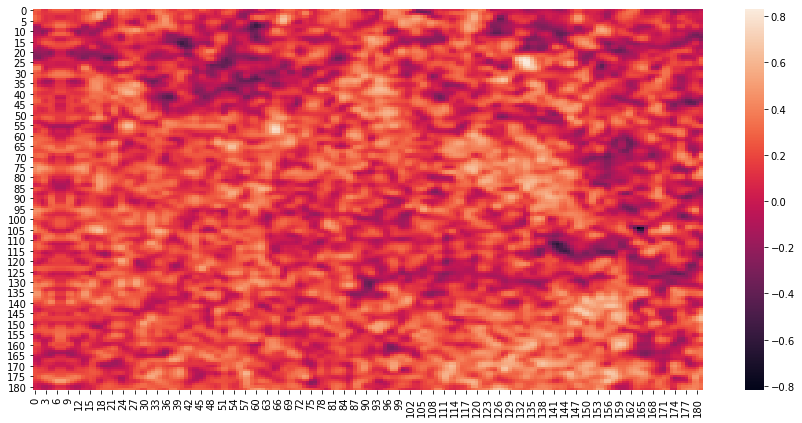

In [713]:
plt.figure(figsize=(15,7))
sns.heatmap(x[6, ..., 11])

In [628]:
import tensorflow as tf

In [679]:
gap_model_path = "../../models/182-gap/"
gap_graph_def = tf.compat.v1.GraphDef()
gap_file = tf.io.gfile.GFile(gap_model_path + "gap_graph.pb", 'rb')
gap_graph_def.ParseFromString(gap_file.read())
gap_graph = tf.import_graph_def(gap_graph_def, name='gap')
gap_sess = tf.compat.v1.Session(graph=gap_graph)
gap_logits = gap_sess.graph.get_tensor_by_name(f"gap/conv2d_8/Sigmoid:0")            
gap_inp = gap_sess.graph.get_tensor_by_name("gap/Placeholder:0")

<AxesSubplot:>

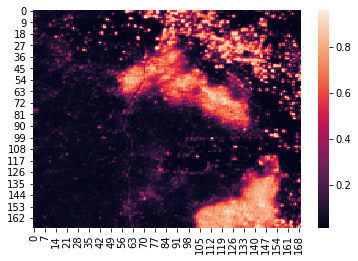

In [684]:
batch_x = x[-1][np.newaxis]
lengths = np.full((batch_x.shape[0]), 12)
preds = gap_sess.run(predict_logits,
                      feed_dict={predict_inp:batch_x})
preds = preds.squeeze()
sns.heatmap(preds)

<AxesSubplot:>

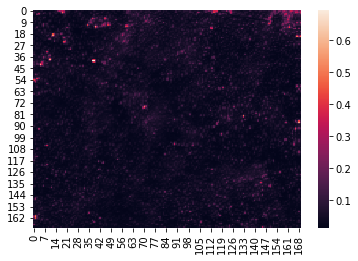

In [689]:
batch_x = y[-1][np.newaxis]
lengths = np.full((batch_x.shape[0]), 12)
preds = gap_sess.run(predict_logits,
                      feed_dict={predict_inp:batch_x})
preds = preds.squeeze()
sns.heatmap(preds)

In [686]:
yx = np.concatenate([y, x], axis = 2)
yx = yx[:, :, 91:-91, :]
yx.shape

(13, 182, 182, 17)

<AxesSubplot:>

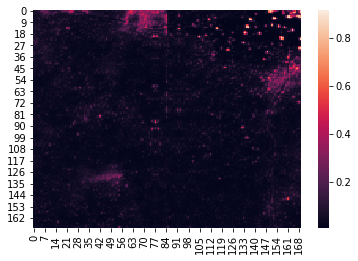

In [690]:
batch_x = yx[-1][np.newaxis]
lengths = np.full((batch_x.shape[0]), 12)
preds = gap_sess.run(predict_logits,
                      feed_dict={predict_inp:batch_x})
preds = preds.squeeze()
sns.heatmap(preds)